In [1]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns  #seaborn has nice features. Need to load pyplot with seaborn at the same time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [4]:
df = pd.read_csv('national_accidents_attributes_adjusted.csv')

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)
df.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,CALM,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,55.0,29.65,10.0,CALM,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1,1


In [6]:
df.describe()

,Severity,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Speed_mph,Precipitation_in,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
count,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06
mean,2.222448e+00,6.237918e+01,6.308089e+01,2.955843e+01,9.151159e+00,7.784320e+00,6.405431e-03,4.300181e-01,1.000210e-01,2.837018e-02,8.616128e-03,1.342003e-02,1.827625e-02,2.501538e-03,1.527592e-04,5.907816e-06,1.265961e-05,9.431238e-02,9.056876e-01,1.054959e-01,1.727977e-01
std,5.752754e-01,1.832461e+01,2.293234e+01,1.018704e+00,2.932016e+00,5.185903e+00,1.014427e-01,4.950785e-01,3.850142e-01,1.660281e-01,9.242239e-02,1.150649e-01,1.339487e-01,6.531417e-02,1.235864e-02,2.430594e-03,3.558013e-03,2.922629e-01,2.922629e-01,3.071914e-01,3.780725e-01
min,1.000000e+00,-2.790000e+01,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.100000e+01,4.700000e+01,2.947000e+01,1.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,6.400000e+01,6.500000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,7.600000e+01,8.200000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+00,1.184000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.698876e+02,2.400000e+01,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.Severity_simple.value_counts()

0    980128
1    204743
Name: Severity_simple, dtype: int64

## One hot encoding for 'Wind_Direction' and 'Sunrise_Sunset'

In [8]:
catvar = ['Wind_Direction','Sunrise_Sunset']

In [9]:
# One-hot encoding for catvar
X_cat = df[catvar]

from sklearn.preprocessing import OneHotEncoder
my_encoder = OneHotEncoder(handle_unknown = 'ignore',sparse = False)
X_encoded = my_encoder.fit_transform(X_cat)

In [10]:
X_encoded.shape

(1184871, 20)

In [11]:
print(my_encoder.categories_[0])
X_encoded_cols = (list(my_encoder.categories_[0])+
                 list(my_encoder.categories_[1]))
print(X_encoded_cols)

['CALM' 'E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW'
 'SW' 'VAR' 'W' 'WNW' 'WSW']
['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Day', 'Night']


In [12]:
X_encoded_df = pd.DataFrame(data = X_encoded, columns = X_encoded_cols)

In [13]:
X_encoded_df.head()

,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW,Day,Night
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
# Add encoded X_cat into df
df2 = pd.concat([df, X_encoded_df], axis  = 1)

## Cubic root transformation of all numerical variables (skewed but has negative values) 

In [15]:
num_var = ['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in']
for col in num_var:
    df2[col+'_cubic_root'] = np.cbrt(df2[col])

In [16]:
df2.isnull().sum()

Severity                       0
Start_Time                     0
City                           0
State                          0
Weather_Timestamp              0
Temp_F                         0
Humidity_percent               0
Pressure_in                    0
Visibility_mi                  0
Wind_Direction                 0
Wind_Speed_mph                 0
Precipitation_in               0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Sunrise_Sunset                 0
Street                         0
Cross_street                   0
CLOUDY                         0
RAIN                           0
FOG       

In [17]:
df2 = df2.drop(columns = ['Severity','Start_Time','Weather_Timestamp','Wind_Direction','Sunrise_Sunset'])

## df2 is the final transformed, full dataset to run models 

In [18]:
df2.head()

,City,State,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW,Day,Night,Temp_F_cubic_root,Humidity_percent_cubic_root,Pressure_in_cubic_root,Visibility_mi_cubic_root,Wind_Speed_mph_cubic_root,Precipitation_in_cubic_root
0,Dublin,OH,42.1,58.0,29.76,10.0,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.478783,3.870877,3.098924,2.154435,2.182786,0.000000
1,Dayton,OH,36.9,91.0,29.68,10.0,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.329217,4.497941,3.096145,2.154435,1.912931,0.271442
2,Cincinnati,OH,36.0,97.0,29.70,10.0,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.301927,4.594701,3.096840,2.154435,1.912931,0.271442
3,Akron,OH,39.0,55.0,29.65,10.0,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.391211,3.802952,3.095102,2.154435,1.912931,0.000000
4,Cincinnati,OH,37.0,93.0,29.69,10.0,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.332222,4.530655,3.096493,2.154435,2.182786,0.215443


## df2 column suggestions 

In [19]:
#All df2 columns
col = list(df2.columns)
print(col)

['City', 'State', 'Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Street', 'Cross_street', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'WINDY', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Non_workday', 'Work_day', 'Rush_hour', 'Severity_simple', 'CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Day', 'Night', 'Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root', 'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']


In [20]:
X_location = ['City','State','Street','Cross_street']  #Columns with location info

#Wind direction binary, may not be relevant
X_wind_direction = ['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S',
                    'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW']   

#Columns that are 100% correlated with another column in the dataset
#'Non_workday' and 'Workday'; 'Day' and 'Night', so only 'Workday' and 'Night' is kept
X_multicollinear = ['Non_workday','Day']

#Columns with cubic root transformation
X_cubic_transformed = ['Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root',
                       'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']

#Columns without transformation
X_num = ['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in']

### Attributes that could be used in modeling, without transformation 

In [21]:
X_no_trans = [i for i in col if (i != 'Severity_simple' and
                                 i != 'Windy' and
                                 i != 'Precipitation_in' and
                                 i not in X_location and
                                 i not in X_multicollinear and
                                 i not in X_cubic_transformed)]
print(X_no_trans)

['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'WINDY', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Work_day', 'Rush_hour', 'CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Night']


In [22]:
#Check correlation
#'CALM' seems to be somewhat correlated with 'Wind_speed_mph'
#'Traffic_calming'seems to be highly correlated with 'Bump'
#num_corr = df2[X_no_trans].corr()
#print(num_corr)
#plt.figure(figsize = (16,16))
#sns.heatmap(num_corr,cmap="vlag",square = True, xticklabels=True, yticklabels=True, center = 0)

### Attributes that could be used in modeling, with cubic root transformation 

## Data sampling (no transformation)

In [23]:
y_nt = df2['Severity_simple']
X_nt = df2[X_no_trans]

In [24]:
X_nt_train, X_nt_test, y_nt_train, y_nt_test = train_test_split(X_nt, y_nt, test_size = 0.3, random_state = 42)

In [25]:
Counter(y_nt_train)

Counter({0: 686027, 1: 143382})

In [26]:
oversample = RandomOverSampler(random_state = 0)

In [27]:
X_nt_over, y_nt_over = oversample.fit_resample(X_nt_train, y_nt_train)

In [28]:
print(Counter(y_nt_over))

Counter({0: 686027, 1: 686027})


In [29]:
undersample = RandomUnderSampler(random_state = 0)

In [30]:
X_nt_under, y_nt_under = undersample.fit_resample(X_nt_train, y_nt_train)

In [31]:
print(Counter(y_nt_under))

Counter({0: 143382, 1: 143382})


## Undersampled, no tuning

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define base model
naive_dt = DecisionTreeClassifier(max_depth = 10)

# AdaBoost
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=500, learning_rate=0.5,
    random_state=42)

In [38]:
ada_clf.fit(X_nt_under, y_nt_under)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.5, n_estimators=500, random_state=42)

In [39]:
y_pred = ada_clf.predict(X_nt_test)

In [40]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_nt_test, y_pred)
print(conf_matrix)

[[191862 102239]
 [ 19733  41628]]


In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score:',precision_score(y_nt_test, y_pred))
print('Recall score:', recall_score(y_nt_test, y_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_pred))
print('F1 score:', f1_score(y_nt_test, y_pred))

Precision score: 0.2893505807447156
Recall score: 0.678411368784733
Accuracy score: 0.656863462198491
F1 score: 0.40567563880172297


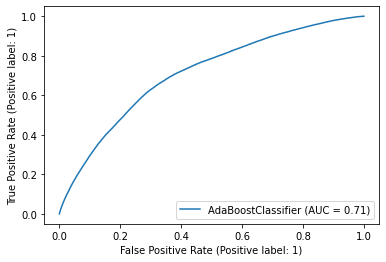

In [43]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(ada_clf, X_nt_test, y_nt_test) 

## Undersampled with tuning

In [44]:
naive_dt = DecisionTreeClassifier()

# AdaBoost
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=1000, learning_rate=0.5,
    random_state=42)

In [45]:
ada_clf.fit(X_nt_under, y_nt_under)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=1000, random_state=42)

In [46]:
y_pred = ada_clf.predict(X_nt_test)

In [47]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_nt_test, y_pred)
print(conf_matrix)

[[199413  94688]
 [ 17866  43495]]


In [48]:
print('Precision score:',precision_score(y_nt_test, y_pred))
print('Recall score:', recall_score(y_nt_test, y_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_pred))
print('F1 score:', f1_score(y_nt_test, y_pred))

Precision score: 0.31476375530998746
Recall score: 0.7088378611821842
Accuracy score: 0.6833585587207635
F1 score: 0.4359439522110411


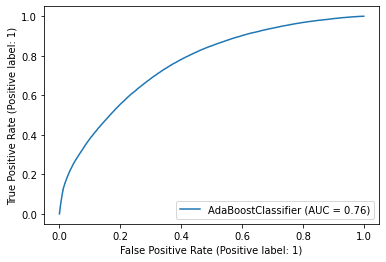

In [49]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(ada_clf, X_nt_test, y_nt_test) 

In [56]:
ada_clf.feature_importances_

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
       3.63433078e-08,            nan,            nan, 2.95980114e-07,
                  nan, 0.00000000e+00,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan, 5.61712133e-08, 8.15689713e-09, 2.04149290e-09,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan])

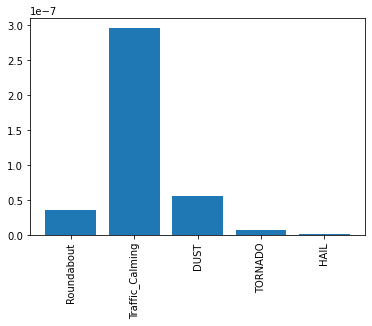

In [55]:
from matplotlib import pyplot
idx = ada_clf.feature_importances_ > 0

x = np.array(X_no_trans)
#print(x[idx])
pyplot.bar(x[idx], ada_clf.feature_importances_[idx])
pyplot.xticks(rotation=90)

pyplot.show()

### Higest severe accidents prediction 

In [57]:
naive_dt = DecisionTreeClassifier()

# AdaBoost
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=3000, learning_rate=0.5,
    random_state=42)

In [58]:
ada_clf.fit(X_nt_under, y_nt_under)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=3000, random_state=42)

In [59]:
y_pred = ada_clf.predict(X_nt_test)

In [60]:
conf_matrix = confusion_matrix(y_nt_test, y_pred)
print(conf_matrix)

[[199825  94276]
 [ 17717  43644]]


In [61]:
print('Precision score:',precision_score(y_nt_test, y_pred))
print('Recall score:', recall_score(y_nt_test, y_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_pred))
print('F1 score:', f1_score(y_nt_test, y_pred))

Precision score: 0.3164443155452436
Recall score: 0.7112661136552534
Accuracy score: 0.6849367864919457
F1 score: 0.4380146627124512


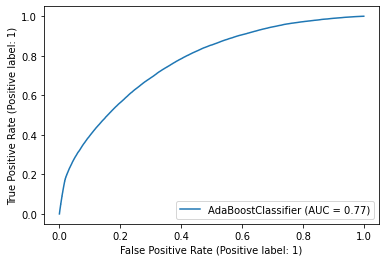

In [62]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(ada_clf, X_nt_test, y_nt_test) 